In [1]:
import os, sys
module_path = os.path.abspath(os.path.join('../'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import khoai

In [3]:
import numpy as np
import pandas as pd


def gen_correlated_data(n_samples=1000, n_dependent_variables=10, min_correlated_variables=1, max_correlated_variables=10, min_corr_target=0.8, max_corr_target=0.95):
    np.random.seed(42)
    X = np.random.normal(size=(n_samples, n_dependent_variables))  # 10 biến độc lập
    col_names = [f"x{i}" for i in range(1, n_dependent_variables + 1)]
    df = pd.DataFrame(X, columns=col_names)

    new_cols = {}
    for col in df.columns:
        num_new = np.random.randint(min_correlated_variables, max_correlated_variables+1)  # từ 1 đến 5 biến mới
        for i in range(num_new):
            sign = np.random.choice([1, -1])          # dương hay âm
            corr_target = sign * np.random.uniform(min_corr_target, max_corr_target)     
            noise = np.random.normal(scale=1, size=n_samples)
            new_col_name = f"{col}_corr_{i+1}"
            new_col = corr_target * df[col] + (1 - abs(corr_target)) * noise
            new_cols[new_col_name] = new_col
    return pd.concat([df, pd.DataFrame(new_cols)], axis=1)

In [ ]:
df = gen_correlated_data(
    n_samples=100_000,
    n_dependent_variables=30,
    min_correlated_variables=10,
    max_correlated_variables=50,
    min_corr_target=0.5,
    max_corr_target=0.85,
)

In [ ]:
# df = df.sample(axis=1, frac=1, random_state=42, replace=False)

In [81]:
df.columns

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       ...
       'x30_corr_12', 'x30_corr_13', 'x30_corr_14', 'x30_corr_15',
       'x30_corr_16', 'x30_corr_17', 'x30_corr_18', 'x30_corr_19',
       'x30_corr_20', 'x30_corr_21'],
      dtype='object', length=943)

In [82]:
from khoai.feature_tools.feature_correlation import feature_correlation_matrix, feature_correlation_community_detection

In [83]:
corr_matrix = feature_correlation_matrix(df)
corr_df = pd.DataFrame(corr_matrix, index=df.columns, columns=df.columns)

In [84]:
corr_df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x30_corr_12,x30_corr_13,x30_corr_14,x30_corr_15,x30_corr_16,x30_corr_17,x30_corr_18,x30_corr_19,x30_corr_20,x30_corr_21
x1,1.000100,0.013969,0.008085,0.004702,0.006427,0.008208,-0.002118,-0.009558,-0.001555,-0.001238,...,-0.002162,-0.009586,0.008603,0.005103,-0.004065,-0.003036,-0.005522,0.001881,-0.014841,-0.001411
x2,0.013969,1.000100,-0.005553,-0.007218,0.004775,0.009335,0.004764,0.014058,0.022014,-0.007325,...,0.002501,0.000884,-0.004788,-0.006341,0.000406,-0.003655,0.004166,0.005798,0.000673,-0.000041
x3,0.008085,-0.005553,1.000100,-0.003874,0.005708,-0.019989,-0.000077,0.003473,-0.002364,0.001404,...,0.006142,0.017988,-0.004723,-0.014455,0.014550,0.001500,0.012181,0.002783,0.015069,0.000522
x4,0.004702,-0.007218,-0.003874,1.000100,0.002941,0.008557,-0.002231,0.003902,0.006618,0.012614,...,-0.005929,-0.003315,0.005418,0.005135,0.006527,-0.006534,0.002262,-0.005960,-0.002926,0.007085
x5,0.006427,0.004775,0.005708,0.002941,1.000100,0.018413,-0.009826,0.008356,-0.011431,-0.001060,...,0.010855,0.005112,-0.005588,-0.013548,0.002779,0.010470,0.014764,-0.007050,0.009505,-0.001170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
x30_corr_17,-0.003036,-0.003655,0.001500,-0.006534,0.010470,-0.014498,0.003520,0.011319,0.005384,-0.019160,...,0.887582,0.746375,-0.773200,-0.857856,0.686416,1.000100,0.849709,-0.753695,0.833290,-0.778781
x30_corr_18,-0.005522,0.004166,0.012181,0.002262,0.014764,-0.015973,0.003087,0.017390,0.008694,-0.008938,...,0.911809,0.769713,-0.789524,-0.878958,0.705174,0.849709,1.000100,-0.776183,0.855498,-0.800840
x30_corr_19,0.001881,0.005798,0.002783,-0.005960,-0.007050,0.012537,-0.002509,-0.011772,-0.006488,0.008175,...,-0.806107,-0.685603,0.700759,0.780659,-0.622489,-0.753695,-0.776183,1.000100,-0.759830,0.715064
x30_corr_20,-0.014841,0.000673,0.015069,-0.002926,0.009505,-0.023044,0.005441,0.020034,-0.000288,-0.014028,...,0.892484,0.751599,-0.773621,-0.862682,0.690705,0.833290,0.855498,-0.759830,1.000100,-0.784074


<Axes: >

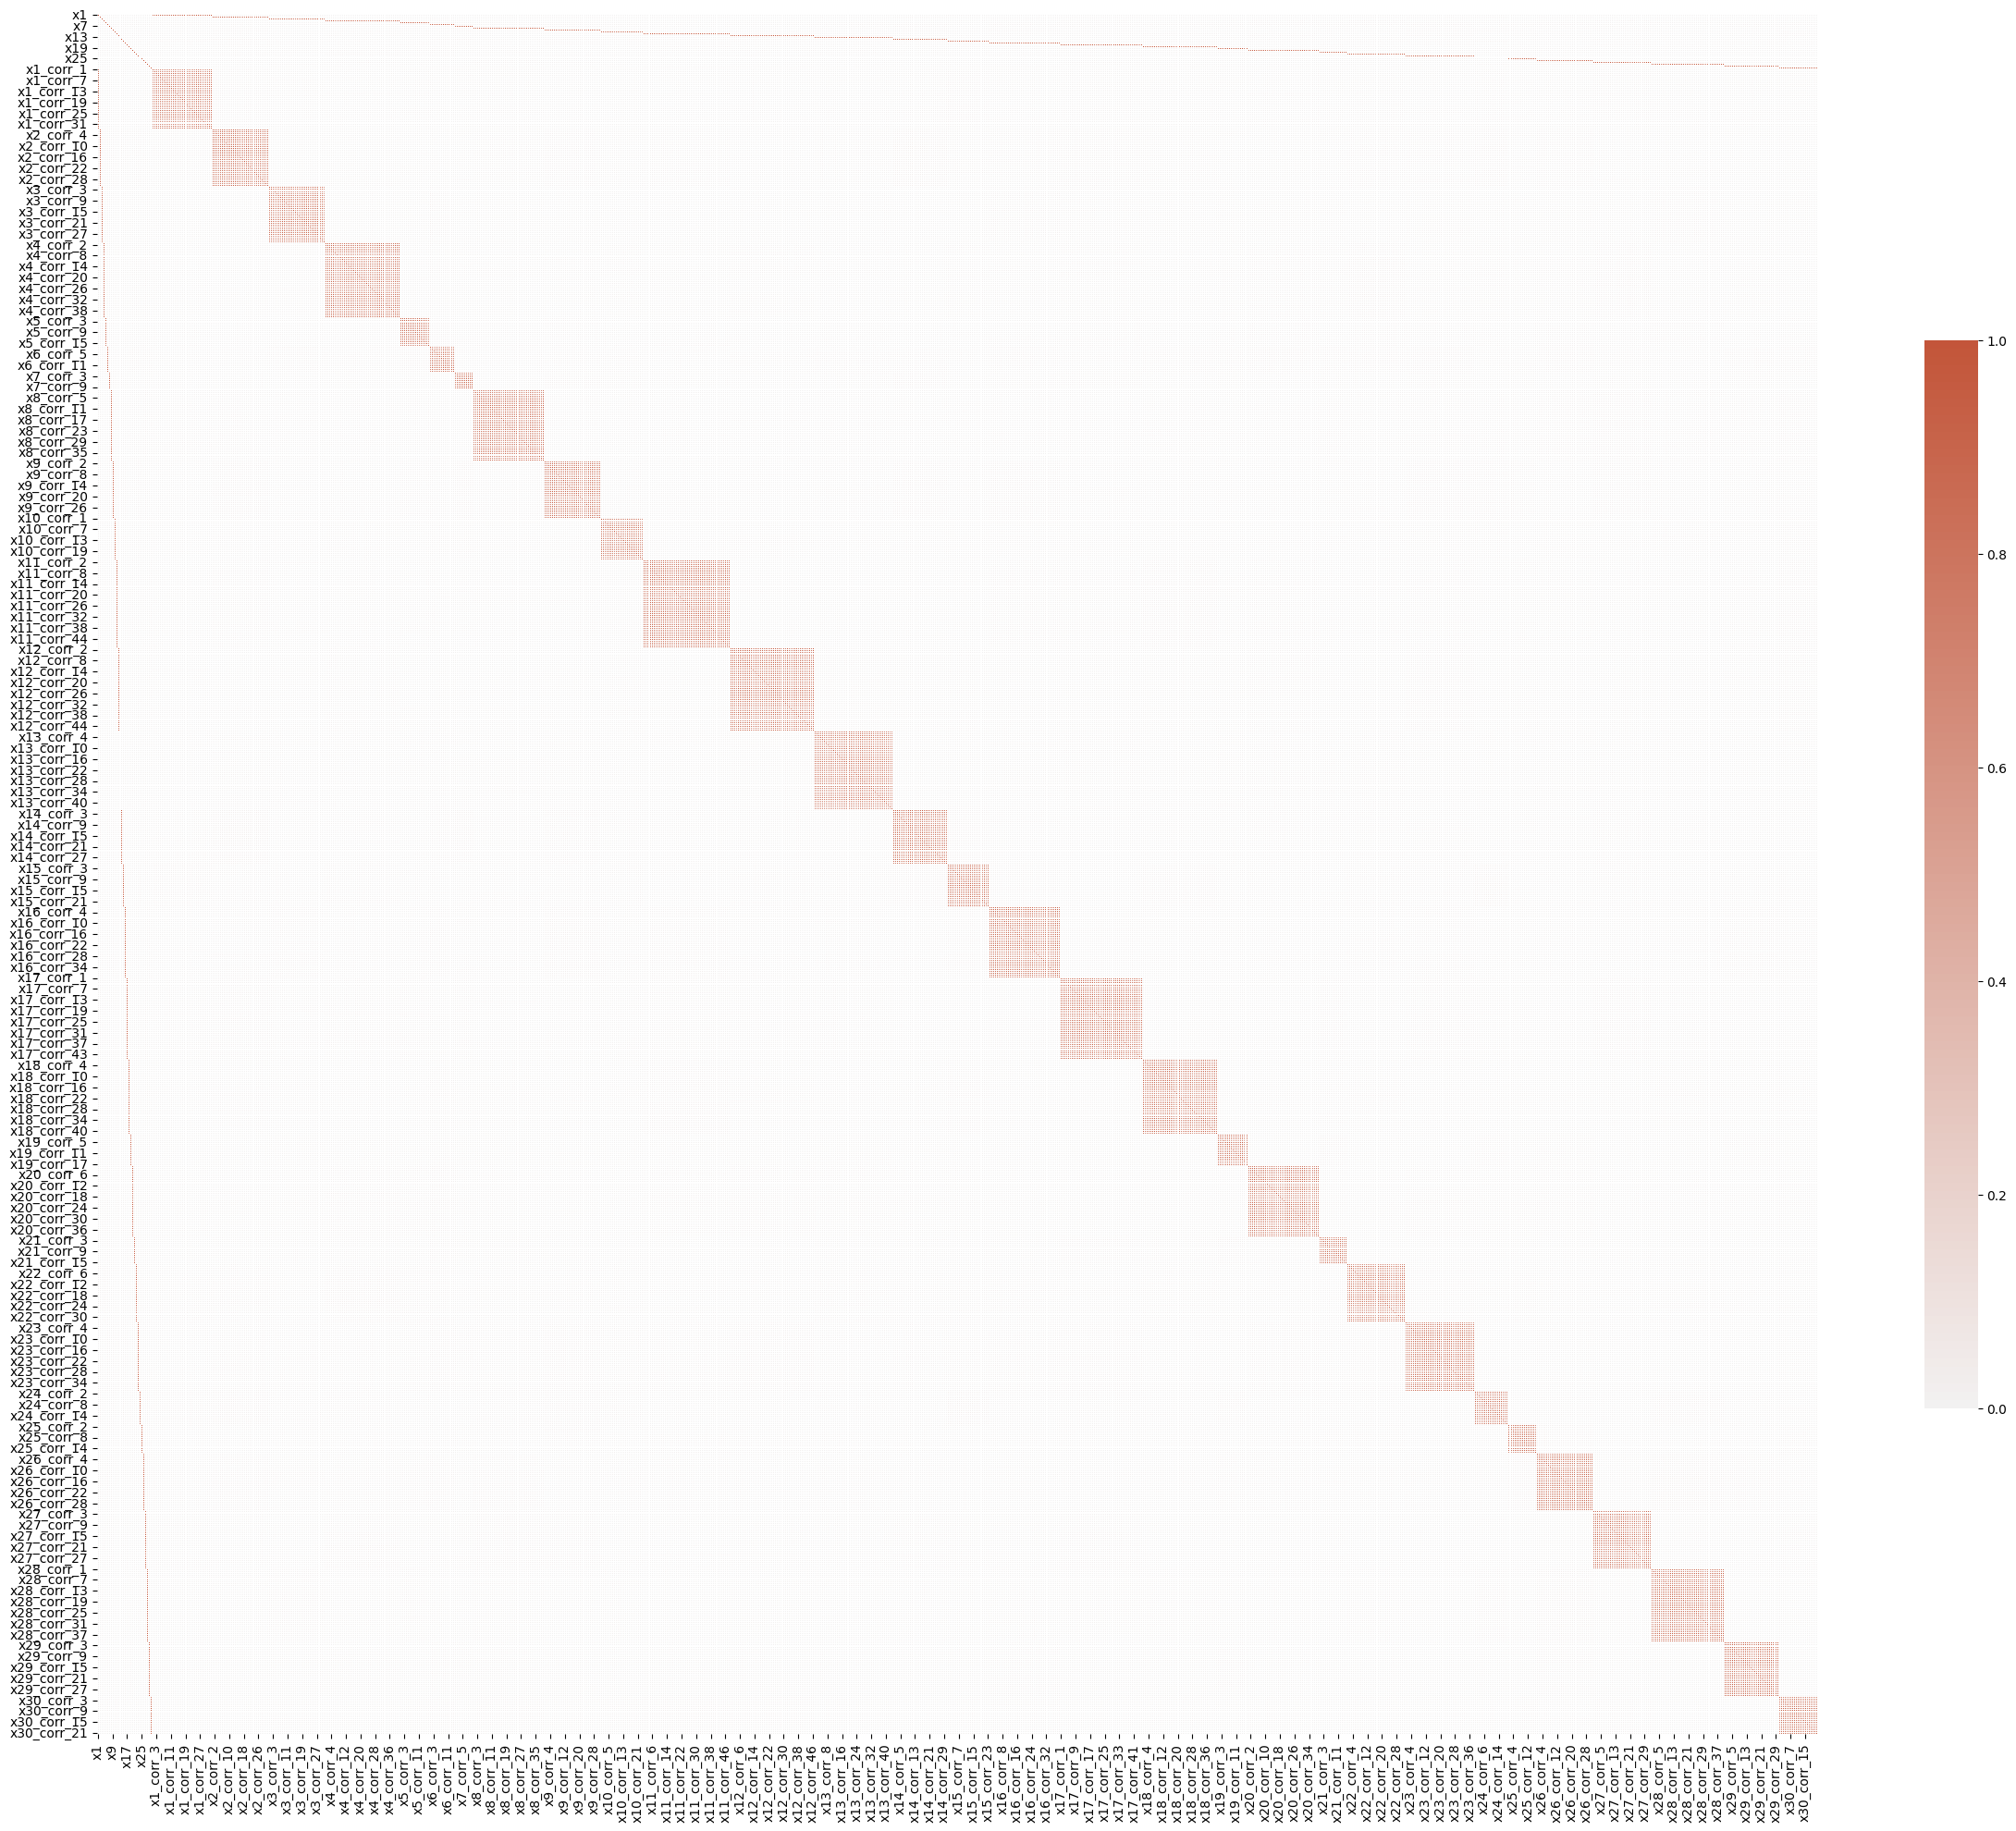

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
new_corr = corr_df.round(2)
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 30))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(abs(new_corr), cmap=cmap, vmax=1, center=0,
            square=True, linewidths=0, cbar_kws={"shrink": .5})

In [86]:
clusters = feature_correlation_community_detection(df)

In [87]:
clusters

[{'x1',
  'x1_corr_1',
  'x1_corr_10',
  'x1_corr_11',
  'x1_corr_12',
  'x1_corr_13',
  'x1_corr_14',
  'x1_corr_15',
  'x1_corr_16',
  'x1_corr_17',
  'x1_corr_18',
  'x1_corr_19',
  'x1_corr_2',
  'x1_corr_20',
  'x1_corr_21',
  'x1_corr_22',
  'x1_corr_23',
  'x1_corr_24',
  'x1_corr_25',
  'x1_corr_26',
  'x1_corr_27',
  'x1_corr_28',
  'x1_corr_29',
  'x1_corr_3',
  'x1_corr_30',
  'x1_corr_31',
  'x1_corr_32',
  'x1_corr_33',
  'x1_corr_4',
  'x1_corr_5',
  'x1_corr_6',
  'x1_corr_7',
  'x1_corr_8',
  'x1_corr_9'},
 {'x2',
  'x2_corr_1',
  'x2_corr_10',
  'x2_corr_11',
  'x2_corr_12',
  'x2_corr_13',
  'x2_corr_14',
  'x2_corr_15',
  'x2_corr_16',
  'x2_corr_17',
  'x2_corr_18',
  'x2_corr_19',
  'x2_corr_2',
  'x2_corr_20',
  'x2_corr_21',
  'x2_corr_22',
  'x2_corr_23',
  'x2_corr_24',
  'x2_corr_25',
  'x2_corr_26',
  'x2_corr_27',
  'x2_corr_28',
  'x2_corr_29',
  'x2_corr_3',
  'x2_corr_30',
  'x2_corr_31',
  'x2_corr_4',
  'x2_corr_5',
  'x2_corr_6',
  'x2_corr_7',
  'x2_c

In [89]:
for i, cluster in enumerate(clusters):
    print(i, set([x.split('_')[0] for x in cluster]))

0 {'x1'}
1 {'x2'}
2 {'x3'}
3 {'x4'}
4 {'x5', 'x6'}
5 {'x7', 'x14'}
6 {'x8'}
7 {'x9'}
8 {'x10'}
9 {'x11'}
10 {'x12'}
11 {'x13'}
12 {'x16'}
13 {'x17'}
14 {'x18'}
15 {'x20'}
16 {'x21', 'x19'}
17 {'x22'}
18 {'x23'}
19 {'x15', 'x24'}
20 {'x25'}
21 {'x26'}
22 {'x27'}
23 {'x28'}
24 {'x29'}
25 {'x30'}
